# Part 1

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/stadtsalat/Documents/Instacart Basket Analysis'

#### QN 1 -- Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# Importing the latest data set
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

In [4]:
# Checking the df
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

QN2 -- Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The data sets were fabricated for the purpose of this course. The customers and prices mentioned are not real meaning that the individuals cannot be identified. For the above reasons, our dataset is not subject to PII laws

#### QN3 -- The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
#### -Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [5]:
# Creating Region list
Region = []

for value in ords_prods_custs ['state']:
 if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    Region.append('North East')
 elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    Region.append('Midwest')
 elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    Region.append('South')
 else:
    Region.append('West')

In [6]:
# Creating the region column 
ords_prods_custs['region'] = Region

In [7]:
# Checking the df for the new region column
ords_prods_custs.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_registered,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [8]:
#Checking the data type of the new column
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

#### -- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
# Crossing spending_flag and region
crosstab = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['spending_flag'], dropna = False)

In [10]:
# Checking the crosstab result
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,7589534,7791
North East,5717129,5607
South,10781873,10012
West,8284433,8480


In [11]:
# Copying crosstab to clipboard
crosstab.to_clipboard()

What we can see from the crosstab is that the South High_Spenders are the ones contributing the most in the total revenue. They are followed by West, Midwest and the North East. 

#### QN 4 -- The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [12]:
# Creating activity flag using the max_order column to set our criteria
ords_prods_custs.loc[ords_prods_custs['max_order']<5, 'activity_flag'] = 'low_activity_customer'
ords_prods_custs.loc[ords_prods_custs['max_order']>=5, 'activity_flag'] = 'normal_activity_customer'

In [13]:
# Checking the df
ords_prods_custs.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer


In [14]:
# Checking the amount of low and normal activity customers
ords_prods_custs['activity_flag']. value_counts(dropna=False)

normal_activity_customer    30964564
low_activity_customer        1440295
Name: activity_flag, dtype: int64

In [15]:
# Checking if the sum of the rows matches the amount of rows on our df
30964564 + 1440295

32404859

In [16]:
# Creating a subset for the low activity customers  
low_activity_custs = ords_prods_custs[ords_prods_custs['activity_flag'] == 'low_activity_customer']

In [17]:
# Checking the subset
low_activity_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,True,196,2,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity_customer
1511,3273029,120,3,2,8,19.0,False,196,2,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity_customer
1512,520620,120,1,3,11,NaN,True,46149,1,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity_customer
1513,3273029,120,3,2,8,19.0,False,46149,1,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity_customer
1514,520620,120,1,3,11,NaN,True,26348,3,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity_customer


In [18]:
# Checking the subset size
low_activity_custs.shape

(1440295, 36)

In [19]:
# Exporting the subset
low_activity_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_act_custs.pkl'))

In [20]:
# Creating a subset for the normal activity customers
ords_prods_custs_normal = ords_prods_custs[ords_prods_custs['activity_flag'] == 'normal_activity_customer']

In [21]:
# Checking the subset
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer


In [22]:
# Checking the subset's size
ords_prods_custs_normal.shape

(30964564, 36)

In [23]:
# Checking the subset's columns
ords_prods_custs_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

In [24]:
# Counting the values left on the new subset
ords_prods_custs_normal['activity_flag'].value_counts(dropna = False)

normal_activity_customer    30964564
Name: activity_flag, dtype: int64

The new df includes only the normal activity customers

QN 5 -- The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### Age profiling

For the age profiling I will use three categories:

18-35 = Young

36-60 = Middle aged

over 60 = Senior

In [25]:
# Creating the age group flag
ords_prods_custs_normal.loc[(ords_prods_custs_normal['age']>=18)&(ords_prods_custs_normal['age']<=35),'age_group_flag']='Young'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['age']>=36)&(ords_prods_custs_normal['age']<=60),'age_group_flag']='Middle aged'
ords_prods_custs_normal.loc[ords_prods_custs_normal['age']>60,'age_group_flag']='Senior'


/var/folders/3y/p4952z696432py_v1pq1tc6h0000gn/T/ipykernel_28253/4263175177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[(ords_prods_custs_normal['age']>=18)&(ords_prods_custs_normal['age']<=35),'age_group_flag']='Young'


In [26]:
# Checking the df
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young


In [27]:
# Checking the df
ords_prods_custs_normal['age_group_flag'].value_counts(dropna=False)

Middle aged    12113152
Senior         10112607
Young           8738805
Name: age_group_flag, dtype: int64

Income profiling

For the income profiling I will use three categories:

<30000 = Low income

30000-100000 = Middle income

over 100000 = High Income

In [28]:
# Creating the income flag
ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']<=30000),'income_flag']='Low income'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']>30000)&(ords_prods_custs_normal['income']<=100000),'income_flag']='Middle income'
ords_prods_custs_normal.loc[ords_prods_custs_normal['income']>100000,'income_flag']='High income'


/var/folders/3y/p4952z696432py_v1pq1tc6h0000gn/T/ipykernel_28253/3880375638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']<=30000),'income_flag']='Low income'


In [29]:
# Checking the df
ords_prods_custs_normal.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,state,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag,income_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young,Middle income


In [30]:
# Checking the df
ords_prods_custs_normal['income_flag'].value_counts(dropna=False)

Middle income    16563404
High income      14207028
Low income         194132
Name: income_flag, dtype: int64

#### Number of depenands profiling

For the number of depenands profiling I will use three categories:

0 depenands = Small household

1-2 depenands = Medium household

more than 3 depenands = Big Household


In [31]:
# Creating the household flag
ords_prods_custs_normal.loc[ords_prods_custs_normal['number_of_dependants'] <= 0 ,'household_flag']='Small household'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['number_of_dependants'] >= 1) & (ords_prods_custs_normal['number_of_dependants'] <= 2),'household_flag']='Medium household'
ords_prods_custs_normal.loc[ords_prods_custs_normal['number_of_dependants']>=3,'household_flag']='Big household'


/var/folders/3y/p4952z696432py_v1pq1tc6h0000gn/T/ipykernel_28253/649267388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[ords_prods_custs_normal['number_of_dependants'] <= 0 ,'household_flag']='Small household'


In [32]:
# Checking the df
ords_prods_custs_normal.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag,income_flag,household_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household


In [33]:
# Checking the df
ords_prods_custs_normal['household_flag'].value_counts(dropna=False)

Medium household    15452367
Big household        7772516
Small household      7739681
Name: household_flag, dtype: int64

In [34]:
ords_prods_custs_normal.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag,income_flag,household_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household


In [35]:
ords_prods_custs_normal.shape

(30964564, 39)

#### Baby Profiling

If a family is buying from department_id=18 (babies) and number of depenands > 0= young child

If department_id is not 18 and number of depenands > 0= young child= older child


In [36]:
# Creating a subset for Babies
babies = ords_prods_custs_normal[ords_prods_custs_normal['department_id']==18]

In [37]:
# Checking the df
babies.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,age,date_registered,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag,income_flag,household_flag
1508,1382150,109,6,1,9,15.0,False,3858,5,0,...,67,7/29/2018,1,married,41805,North East,normal_activity_customer,Senior,Middle income,Medium household


### I run in major problems with the size of the new dfs that I created so far. There was no more space left in my laptop, so I decided to reduce the size of this subset and for the visualizations I will use sampling

In [38]:
# Reducing the size of the subset
babies = babies[['user_id','department_id']]

In [40]:
# Checking the subset
babies.head() 

,user_id,department_id
1508,109,18
2893,290,18
3508,290,18
3982,420,18
4030,420,18


In [41]:
# Checking the subset
babies.shape

(410392, 2)

In [42]:
# Removing duplicates
babies = babies.drop_duplicates()

In [43]:
# Checking the subset
babies.shape

(30230, 2)

In [44]:
# Creating a list for babies
list_babies = babies['user_id'].unique()

In [45]:
# Checking the list
list_babies

array([   109,    290,    420, ..., 149691, 194803,  21688])

In [46]:
# Creating the baby flag
ords_prods_custs_normal.loc[(ords_prods_custs_normal['user_id'].isin(list_babies))&(ords_prods_custs_normal['number_of_dependants']>0),'baby_flag']='Young child'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['department_id']!=18)&(ords_prods_custs_normal['number_of_dependants']>0),'baby_flag']='Older child'
ords_prods_custs_normal.loc[ords_prods_custs_normal['number_of_dependants']==0,'baby_flag']='No child'


/var/folders/3y/p4952z696432py_v1pq1tc6h0000gn/T/ipykernel_28253/3863877669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[(ords_prods_custs_normal['user_id'].isin(list_babies))&(ords_prods_custs_normal['number_of_dependants']>0),'baby_flag']='Young child'


In [47]:
# Checking the df
ords_prods_custs_normal.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,date_registered,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag,income_flag,household_flag,baby_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household,Older child


In [48]:
# Checking the df
ords_prods_custs_normal['baby_flag'].value_counts(dropna=False)

Older child    22917819
No child        7739681
Young child      307064
Name: baby_flag, dtype: int64

#### QN 6 --  Create an appropriate visualization to show the distribution of profiles.

In [52]:
# First I will create a sammple subset
dev = np.random.rand(len(ords_prods_custs_normal)) <= 0.7

In [53]:
dev

array([ True, False,  True, ..., False,  True,  True])

In [54]:
np.random.seed(4)

In [55]:
# Storing 70% of the df in the new df big
big = ords_prods_custs_normal[dev]

In [56]:
# Storing 30% of the df in the new df smal
small = ords_prods_custs_normal[~dev]

In [57]:
# Checking if the size of the new dfs together is the same as 
len(ords_prods_custs_normal)

30964564

In [58]:
len(big)+len(small)

30964564

In [59]:
small.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,date_registered,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag,income_flag,household_flag,baby_flag
1,2398795,1,2,3,7,15.0,False,196,1,1,...,2/17/2019,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household,Older child


#### Age group

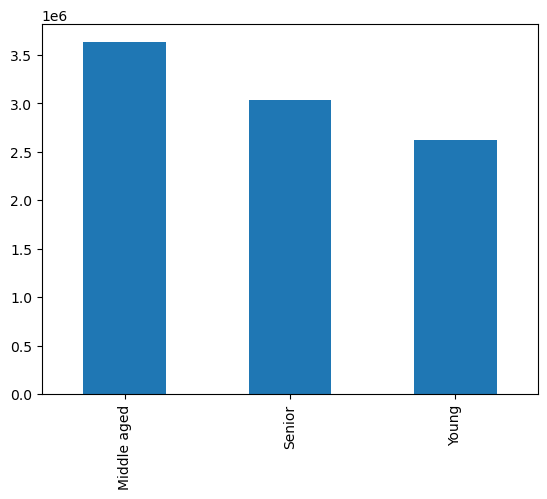

In [61]:
# Bar chart for age group
barchart_age_group=small['age_group_flag'].value_counts().plot.bar()

#### Income

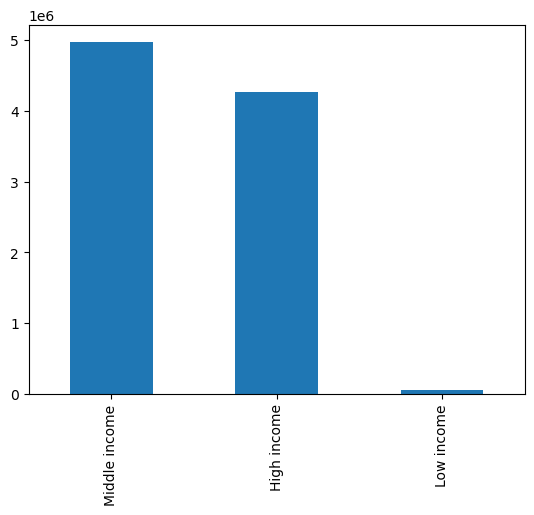

In [62]:
# Bar chart for Income
barchart_income=small['income_flag'].value_counts().plot.bar()

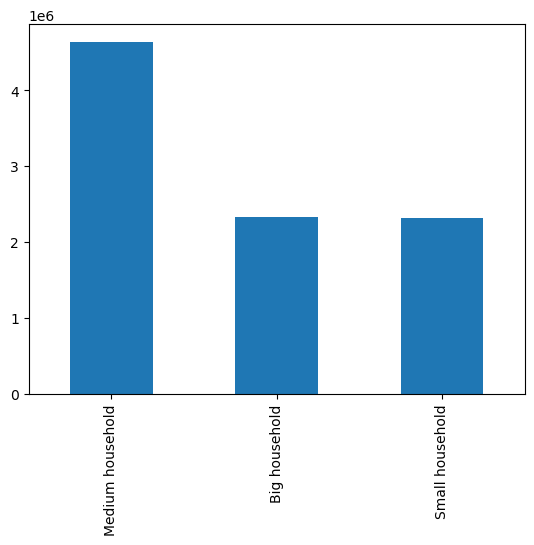

In [63]:
# Bar chart for household size
barchart_household_size=small['household_flag'].value_counts().plot.bar()

#### Child age in household

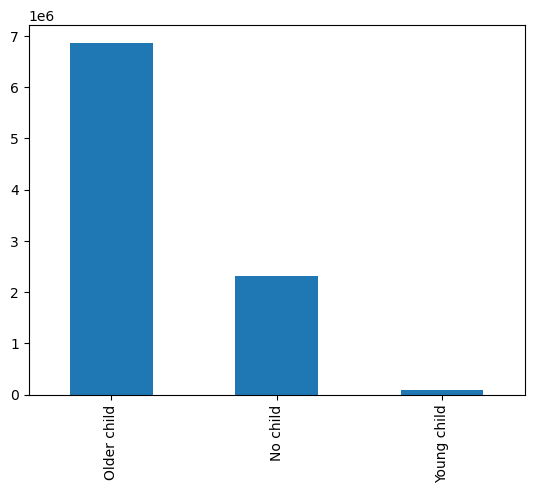

In [64]:
# Bar chart for child age
barchart_child=small['baby_flag'].value_counts().plot.bar()

#### QN 7 -- Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [66]:
# Checking the df
ords_prods_custs_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 40 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

#### Age

In [67]:
# Aggregating frequency per age
ords_prods_custs_normal.groupby('age_group_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                 mean  min   max
age_group_flag                                  
Middle aged                 10.812179  0.0  30.0
Senior                      10.791879  0.0  30.0
Young                       10.829007  0.0  30.0

In [68]:
# Aggregating expenditure per age
ords_prods_custs_normal.groupby('age_group_flag').agg({'prices':['mean', 'min','max']})

prices           
                    mean  min   max
age_group_flag                     
Middle aged     7.790531  1.0  25.0
Senior          7.796144  1.0  25.0
Young           7.784246  1.0  25.0

#### Income

In [69]:
# Aggregating frequency per income
ords_prods_custs_normal.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                mean  min   max
income_flag                                    
High income                10.769663  0.0  30.0
Low income                 11.595375  0.0  30.0
Middle income              10.836047  0.0  30.0

In [72]:
# Aggregating expenditure per income
ords_prods_custs_normal.groupby('income_flag').agg({'prices':['mean', 'min','max']})

prices           
                   mean  min   max
income_flag                       
High income    7.953438  1.0  25.0
Low income     6.532439  1.0  25.0
Middle income  7.665700  1.0  25.0

#### Household size


In [71]:
# Aggregating frequency per household size
ords_prods_custs_normal.groupby('household_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                   mean  min   max
household_flag                                    
Big household                 10.816223  0.0  30.0
Medium household              10.816513  0.0  30.0
Small household               10.791951  0.0  30.0

In [73]:
# Aggregating expenditure per household size
ords_prods_custs_normal.groupby('household_flag').agg({'prices':['mean', 'min','max']})

prices           
                      mean  min   max
household_flag                       
Big household     7.792886  1.0  25.0
Medium household  7.789957  1.0  25.0
Small household   7.789550  1.0  25.0

#### Child age

In [75]:
# Aggregating frequency per child age
ords_prods_custs_normal.groupby('baby_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                              mean  min   max
baby_flag                                    
No child                 10.791951  0.0  30.0
Older child              10.831001  0.0  30.0
Young child               9.737722  0.0  30.0

In [76]:
# Aggregating expenditure per child age
ords_prods_custs_normal.groupby('baby_flag').agg({'prices':['mean', 'min','max']})

prices           
                 mean  min   max
baby_flag                       
No child     7.789550  1.0  25.0
Older child  7.792857  1.0  25.0
Young child  7.647681  1.0  15.0

#### QN 8 -- Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [131]:
# Importing departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [132]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [134]:
# Renaming Unnamed:0 column = department_id
dept.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [135]:
# Checking the df
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [136]:
# Turning department dataframe into data dictionary
zipped=zip(dept['department_id'], dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [137]:
# department names = department_id 
ords_prods_custs_normal['department'] = ords_prods_custs_normal['department_id'].map(data_dict)

/var/folders/3y/p4952z696432py_v1pq1tc6h0000gn/T/ipykernel_28253/2584066056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal['department'] = ords_prods_custs_normal['department_id'].map(data_dict)


In [138]:
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,number_of_dependants,marital_status,income,region,activity_flag,age_group_flag,income_flag,household_flag,baby_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household,Older child,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household,Older child,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household,Older child,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household,Older child,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,South,normal_activity_customer,Young,Middle income,Big household,Older child,beverages


#### Age

In [77]:
# We need to create crosstab between age and region flags
age_region =pd.crosstab(ords_prods_custs_normal['age_group_flag'], ords_prods_custs_normal['region'])

In [79]:
age_region

region,Midwest,North East,South,West
age_group_flag,,,,
Middle aged,2886332,2104198,3999499,3123123
Senior,2356770,1809013,3361229,2585595
Young,2018411,1551474,2950411,2218509


In [80]:
# Export to clipboard
age_region.to_clipboard()

In [142]:
# Crosstab between age and department flags
age_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['age_group_flag'])

In [143]:
age_depart

age_group_flag,Middle aged,Senior,Young
department,,,
alcohol,56614,45628,42385
babies,163908,133019,113465
bakery,437780,366017,317031
beverages,1009824,844687,717390
breakfast,261894,217539,191417
bulk,12898,10929,9624
canned goods,395410,329485,287179
dairy eggs,2017712,1687944,1471526
deli,391004,328967,283863


In [144]:
# Export to clipboard
age_depart.to_clipboard()

#### Income

In [145]:
# Crosstab between income and region flags
income_region =pd.crosstab(ords_prods_custs_normal['income_flag'], ords_prods_custs_normal['region'])

In [85]:
income_region

region,Midwest,North East,South,West
income_flag,,,,
High income,3400093,2516484,4663571,3626880
Low income,53250,33144,65230,42508
Middle income,3808170,2915057,5582338,4257839


In [86]:
# Export to clipboard
income_region.to_clipboard()

In [146]:
# Crosstab between income and department flags
income_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['income_flag'])

In [147]:
income_depart

income_flag,High income,Low income,Middle income
department,,,
alcohol,69142,1247,74238
babies,196696,1509,212187
bakery,527703,6023,587102
beverages,1126437,23403,1422061
breakfast,297594,4802,368454
bulk,14218,333,18900
canned goods,485226,4206,522642
dairy eggs,2406160,28400,2742622
deli,462089,6505,535240


In [148]:
# Export to clipboard
income_depart.to_clipboard()

#### Household size

In [91]:
# Crosstab between household size and region flags
household_region =pd.crosstab(ords_prods_custs_normal['household_flag'], ords_prods_custs_normal['region'])

In [92]:
household_region

region,Midwest,North East,South,West
household_flag,,,,
Big household,1787286,1381233,2585864,2018133
Medium household,3651411,2728970,5143342,3928644
Small household,1822816,1354482,2581933,1980450


In [93]:
# Export to clipboard
household_region.to_clipboard()

In [149]:
# Crosstab between household and department flags
household_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['household_flag'])

In [150]:
household_depart

household_flag,Big household,Medium household,Small household
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


In [151]:
# Export to clipboard
household_depart.to_clipboard()

#### Child Age

In [97]:
# Crosstab between household size and region flags
child_region =pd.crosstab(ords_prods_custs_normal['baby_flag'], ords_prods_custs_normal['region'])

In [98]:
child_region

region,Midwest,North East,South,West
baby_flag,,,,
No child,1822816,1354482,2581933,1980450
Older child,5367664,4055516,7624975,5869664
Young child,71033,54687,104231,77113


In [99]:
# Export to clipboard
child_region.to_clipboard()

In [152]:
# Crosstab between household and department flags
child_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['baby_flag'])

In [153]:
child_depart

baby_flag,No child,Older child,Young child
department,,,
alcohol,36827,107800,0
babies,103328,0,307064
bakery,281395,839433,0
beverages,645341,1926560,0
breakfast,166432,504418,0
bulk,8000,25451,0
canned goods,251020,761054,0
dairy eggs,1294376,3882806,0
deli,253382,750452,0


In [154]:
# Export to clipboard
child_depart.to_clipboard()

#### QN 9 -- Produce suitable charts to illustrate your results and export them in your project folder.


#### Age and region

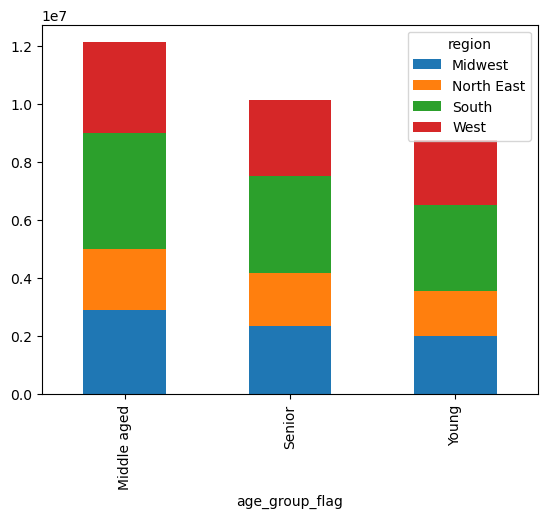

In [103]:
barchart_age_region=age_region.plot(kind= 'bar', stacked = True)

 South has the most customers accross regions and the age distribution is similar 

In [104]:
# Exporting barchart_age_region
barchart_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_age_region.png'))

#### Age and Department

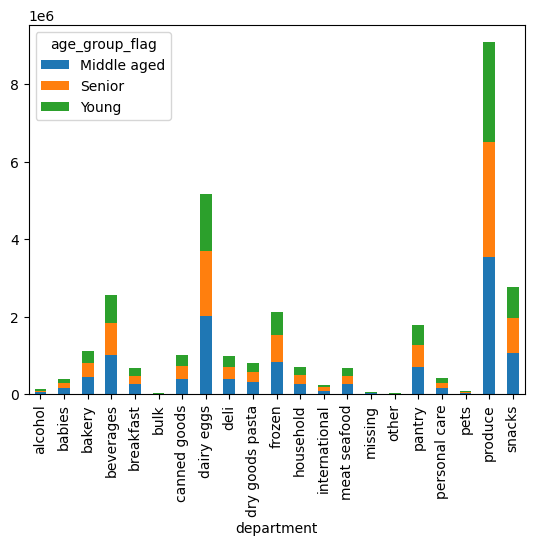

In [155]:
barchart_age_depart=age_depart.plot(kind= 'bar', stacked = True)

Produce has by far the most sales across all categories and age groups followed by dairy-eggs, snacks and beverages

In [156]:
# Exporting barchart_age_dept
barchart_age_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_age_depart.png'))

#### Income and region

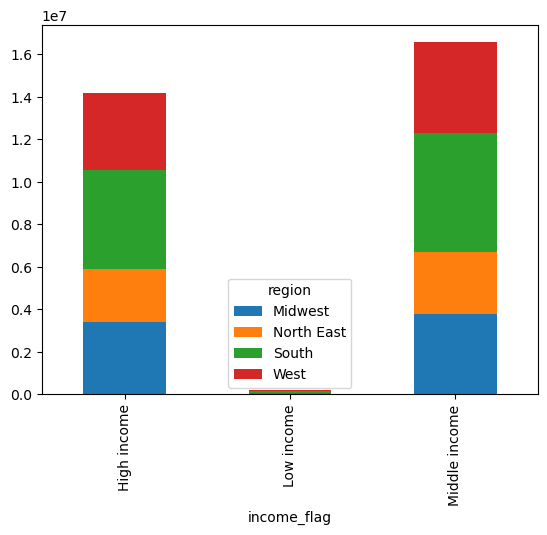

In [157]:
barchart_income_region=income_region.plot(kind= 'bar', stacked = True)

South is (once more) the best selling region. People with middle income contribute the most in total sales

In [158]:
# Exporting barchart_income_region
barchart_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_income_region.png'))

#### Income and department

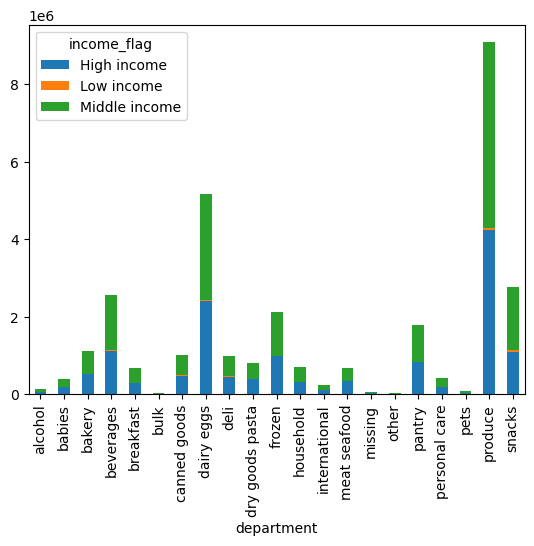

In [159]:
barchart_income_depart=income_depart.plot(kind= 'bar', stacked = True)

Middle income people dominate in most of department categories

In [160]:
# Exporting barchart_income_depart
barchart_income_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_income_depart.png'))

#### Household and Region

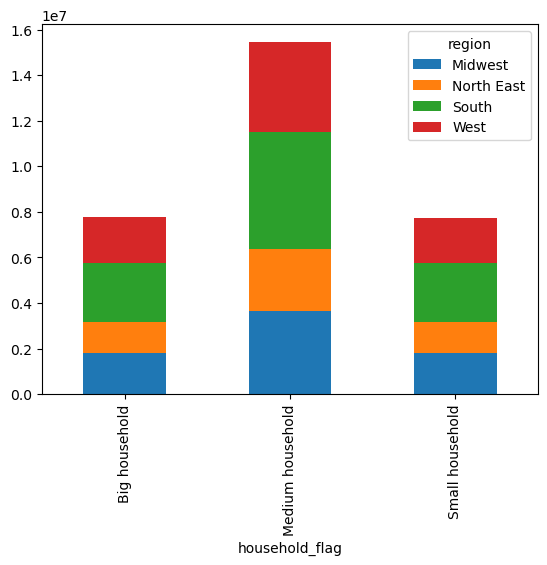

In [161]:
barchart_household_region=household_region.plot(kind= 'bar', stacked = True)

Most of the customers are Medium size households across all regions

In [162]:
# Exporting barchart_income_depart
barchart_household_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_household_region.png'))

#### Household and Department

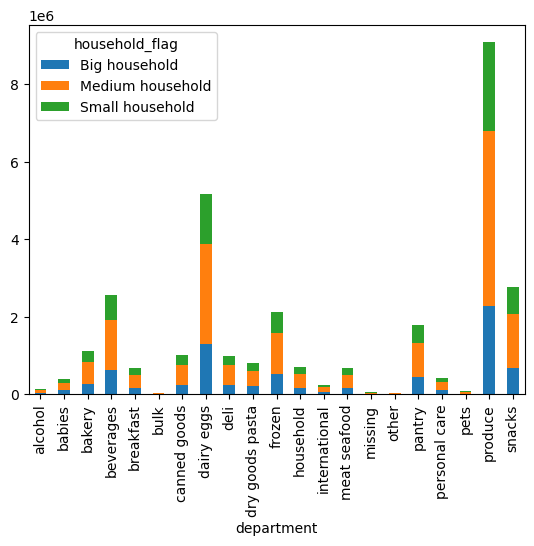

In [164]:
barchart_household_depart=household_depart.plot(kind= 'bar', stacked = True)

The selling categories are the same as earlier with medium size households dominating the produce

In [167]:
# Exporting barchart_household_depart
barchart_household_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_household_depart.png'))

#### Children and region

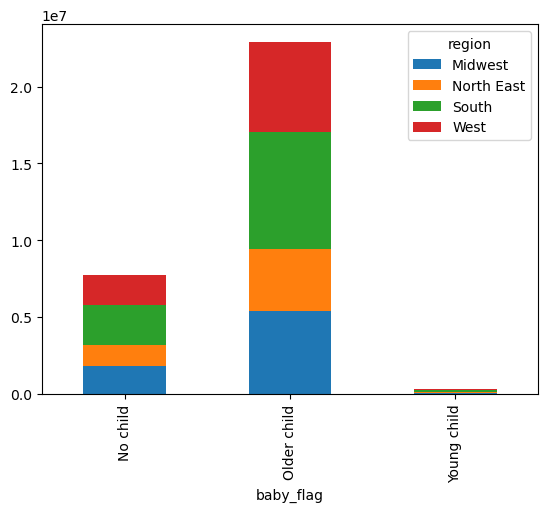

In [166]:
barchart_child_region=child_region.plot(kind= 'bar', stacked = True)

The South has most families with older children. Most of the customers , by far, are families with older children. 

In [168]:
# Exporting barchart_child_region
barchart_child_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_child_region.png'))

#### Children and department

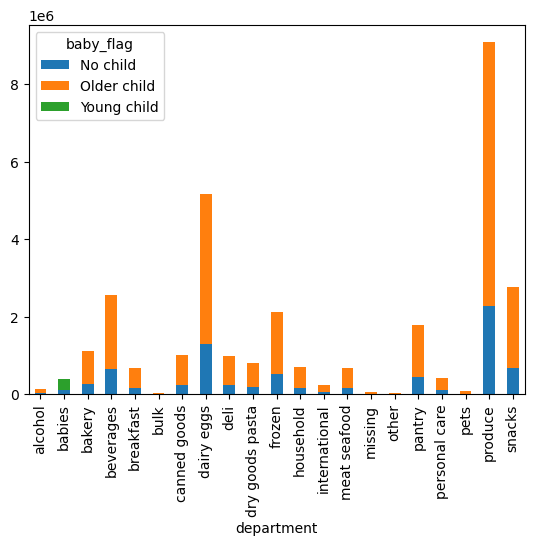

In [169]:
barchart_child_depart=child_depart.plot(kind= 'bar', stacked = True)

Families with older children dominate all department categories.

Produce, eggs_dairy and snacks are the strongest categories amongst families with older children

#### Loyalty Flag

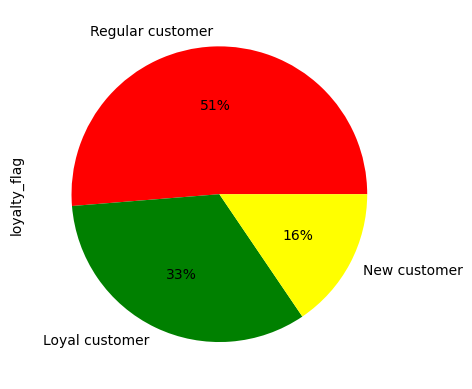

In [171]:
# Creating pie chart 
pie_loyalty = ords_prods_custs_normal['loyalty_flag'].value_counts().plot.pie(autopct=('%1.f%%'), colors=['red','green','yellow'])


In [172]:
# Exporting pie chart
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

In [173]:
#  Exporting the df
ords_prods_custs_normal.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custs_normal.pkl'))